In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
import seaborn as sns
import collections

In [49]:
def ecdf(data):
    """
    Empirical CDF (x, y) generator
    """
    x = np.sort(data)
    cumulative_prob_density = np.linspace(0, 1, len(x))
    return cumulative_prob_density, x

def elbow_detection(data, threshold=1, tune=0.01, get_index=False):
    cdf, ordered = ecdf(data)
    data_2nd_deriv = np.diff(np.diff(ordered))
    elbow_point = np.argmax(data_2nd_deriv > threshold) - int(len(cdf) * tune)
    return elbow_point if get_index else ordered[elbow_point]

In [2]:
%%time
data = pd.read_table('/data4/Ant_genomes/invictus-biallelic.table')
display(data.head())
print(len(data))

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,AF,AC,AN,DP,MQ,QD,FS,SOR,MQRankSum,ReadPosRankSum
0,NW_020456309.1,1,.,T,.,63.80,PASS,NaN,NaN,NaN,NaN,19.0,33,NaN,NaN,NaN,NaN,NaN,NaN
1,NW_020456309.1,2,.,G,.,66.78,PASS,NaN,NaN,NaN,NaN,19.0,33,NaN,NaN,NaN,NaN,NaN,NaN
2,NW_020456309.1,3,.,T,.,61.11,PASS,NaN,NaN,NaN,NaN,19.0,33,NaN,NaN,NaN,NaN,NaN,NaN
3,NW_020456309.1,4,.,A,.,65.18,PASS,NaN,NaN,NaN,NaN,19.0,33,NaN,NaN,NaN,NaN,NaN,NaN
4,NW_020456309.1,5,.,A,.,67.34,PASS,NaN,NaN,NaN,NaN,19.0,33,NaN,NaN,NaN,NaN,NaN,NaN


317141415
CPU times: user 5min 12s, sys: 4min 10s, total: 9min 23s
Wall time: 10min 8s


In [28]:
data = data[data['AN'] == 40]
data.dropna(subset=['AC'], inplace=True)
display(data.head())
print(len(data))

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,AF,AC,AN,DP,MQ,QD,FS,SOR,MQRankSum,ReadPosRankSum
427,NW_020456309.1,433,.,C,T,743.38,PASS,NaN,NaN,0.075,3.0,40.0,140,NaN,29.67,0.0,1.127,NaN,NaN
677,NW_020456309.1,701,.,G,A,226.41,PASS,NaN,NaN,0.050,2.0,40.0,130,NaN,32.34,0.0,1.609,NaN,NaN
1316,NW_020456309.1,1357,.,C,T,394.31,PASS,NaN,NaN,0.025,1.0,40.0,134,NaN,33.74,0.0,0.859,NaN,NaN
2231,NW_020456309.1,2295,.,T,A,557.38,PASS,NaN,NaN,0.075,3.0,40.0,146,NaN,28.07,0.0,1.112,NaN,NaN
2740,NW_020456309.1,2835,.,G,A,423.31,PASS,NaN,NaN,0.025,1.0,40.0,139,NaN,28.92,0.0,0.836,NaN,NaN


1429218


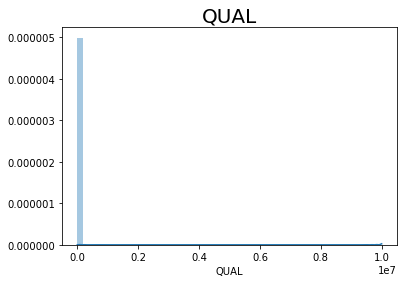

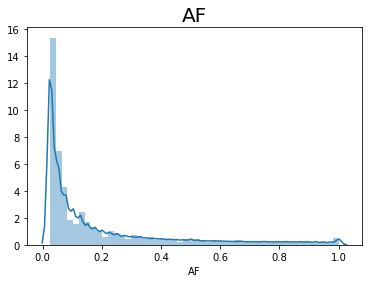

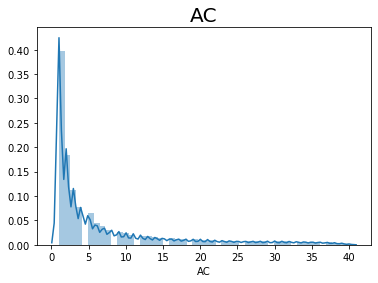

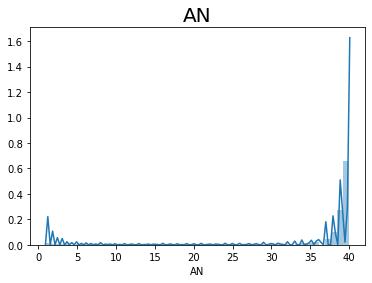

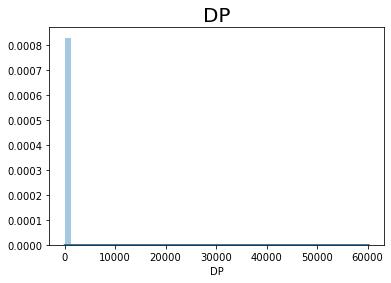

In [4]:
for col in['QUAL', 'AF', 'AC', 'AN', 'DP']:
    graph.title(col, fontsize=20)
    sns.distplot(data[col].dropna())
    graph.show()

# Get columns into numpy array cause faster

In [29]:
qual = data['QUAL'].values
depth = data['DP'].values
allele_number = data['AN'].values

# QUAL

In [61]:
filter_qual = qual < 7000
new_qual = qual[filter_qual]
print(len(qual))
print(len(new_qual))

print(f" Removed sites: {len(qual) - len(new_qual)}")

1429218
1323258
 Removed sites: 105960


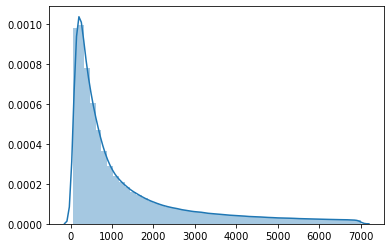

In [62]:
sns.distplot(new_qual)

In [50]:
elbow_detection(new_qual)

3019.96

# Allele Number

In [7]:
data['AN'].value_counts()

40.0    162941226
39.0     67959945
38.0     25591989
37.0     11621956
36.0      6382819
35.0      4269917
34.0      3128031
1.0       2645666
33.0      2463395
32.0      1972204
31.0      1636837
2.0       1514532
30.0      1446603
29.0      1243168
3.0       1186157
28.0      1142379
27.0      1097769
26.0      1058036
4.0       1036204
25.0       957946
5.0        933623
19.0       923110
24.0       898838
23.0       836912
6.0        835896
20.0       829756
22.0       813048
18.0       803066
21.0       791098
17.0       785741
7.0        783220
8.0        760518
16.0       730218
15.0       711322
9.0        706278
14.0       690153
10.0       680127
13.0       663569
12.0       658444
11.0       646539
Name: AN, dtype: int64

# Depth

In [44]:
filter_depth = depth < 500
new_depth = depth[filter_depth]
print(len(new_depth))

print(f" Removed sites: {len(depth) - len(new_depth)}")

1419978
 Removed sites: 9240


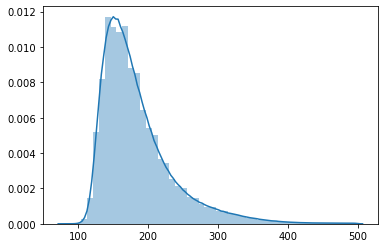

In [45]:
sns.distplot(new_depth)

In [46]:
lower_iqr = np.quantile(new_depth, 0.25)
upper_iqr = np.quantile(new_depth, 0.75)

iqr = upper_iqr - lower_iqr
print(lower_iqr, iqr, upper_iqr)

149.0 56.0 205.0


In [47]:
lower_depth = lower_iqr-(1.5*iqr)
upper_depth = upper_iqr+(1.5*iqr)

print(lower_depth, upper_depth)

65.0 289.0


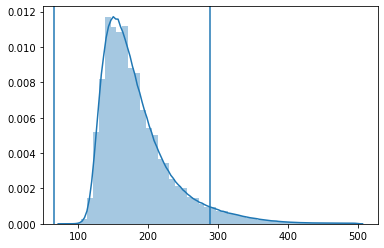

In [48]:
sns.distplot(new_depth)
graph.axvline(lower_depth)
graph.axvline(upper_depth)
graph.show()